# Cardic detection

# Imports

* pathlib for easy path handling
* pydicom for reading dicom files
* numpy for storing the actual images
* cv2 for directly resizing the images
* pandas to read the provided labels
* matplotlib for visualization
* patches from matplotlib to draw bounding boxes

# DATASET
At first we download the data from kaggle (https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data), by clicking on "Download All" and extract it afterwards.

Acknowledgements:
Wang X, Peng Y, Lu L, Lu Z, Bagheri M, Summers RM. ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases. IEEE CVPR 2017, http://openaccess.thecvf.com/content_cvpr_2017/papers/Wang_ChestX-ray8_Hospital-Scale_Chest_CVPR_2017_paper.pdf

Original Source: https://nihcc.app.box.com/v/ChestXray-NIHCC

In [ ]:
from pathlib import Path
import numpy as np
import pydicom
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


import torch
import torchvision
from torchvision import transforms
import torchmetrics
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
import matplotlib.patches as patches

In [ ]:
ROOT_PATH=Path("/content/stage_2_train_images")
SAVE_PATH=Path("/content/proccesed")

In [ ]:
labels=pd.read_csv("/content/drive/MyDrive/rsna_heart_detection.csv")

In [ ]:
labels.head()

,label,x0,y0,w,h,name,img_shape_x,img_shape_y
0,heart,91,71,77,102,ca112a3c-b701-48b8-a94f-725ea65416a7,224,224
1,heart,70,64,89,67,e5f292ae-f1e5-497c-b0a0-68f1aa2196b2,224,224
2,heart,82,55,81,76,67af68f7-7ba0-49a0-a373-3a8801eb0faa,224,224
3,heart,93,74,78,89,814289a3-9ce8-4cba-842f-45d6a36f540d,224,224
4,heart,85,61,85,93,e508969f-c931-462b-aa90-ccde34a4d9e5,224,224


**convert pydicom to array

**resize the images to 224 by 224

**draw patches

**visualize

PREPROCESSING

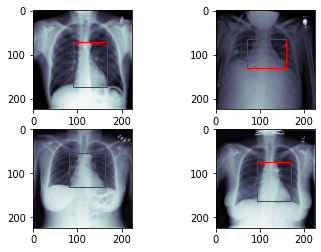

In [ ]:
fig, axis=plt.subplots(2,2)
c=0
for i in range (2):
  for j in range(2):
    data=labels.iloc[c]
    patient_id=data['name']
    dcm_path= ROOT_PATH/str(patient_id)
    dcm_path=dcm_path.with_suffix(".dcm")

    dcm=pydicom.read_file(dcm_path)
    dcm_array=dcm.pixel_array
    dcm_array=cv2.resize(dcm_array,(224,224))
    x=data['x0']
    y=data['y0']
    width=data['w']
    height=data['h']

    axis[i][j].imshow(dcm_array,cmap='bone')
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor='none')
    axis[i][j].add_patch(rect)
    c+=1  





**just visualize the images without patches

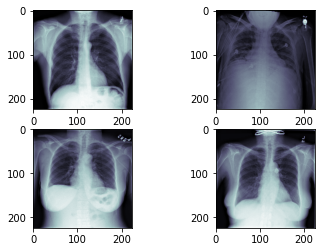

In [ ]:
fig, axis=plt.subplots(2,2)
c=0
for i in range (2):
  for j in range(2):
    data=labels.iloc[c]
    patient_id=data['name']
    dcm_path= ROOT_PATH/str(patient_id)
    dcm_path=dcm_path.with_suffix(".dcm")

    dcm=pydicom.read_file(dcm_path)
    dcm_array=dcm.pixel_array
    dcm_array=cv2.resize(dcm_array,(224,224))
    
    axis[i][j].imshow(dcm_array,cmap='bone')
   
    c+=1  

In [ ]:

sums, sums_squared= 0,0
train_ids=[]
val_ids =[]

for counter, patient_id in enumerate(list(labels.name)):
  dcm_path=ROOT_PATH/str(patient_id)


In [ ]:
dcm_array.shape[0] 

224

In [ ]:
dcm_array.shape[1] 

224

** standadrize all images
** split the dataset 
** normalize the traing set only

In [ ]:
sums, sums_squared= 0,0
train_ids=[]
val_ids =[]

for counter, patient_id in enumerate(list(labels.name)):
    dcm_path= ROOT_PATH/str(patient_id)
    dcm_path=dcm_path.with_suffix(".dcm")

    dcm=pydicom.read_file(dcm_path)
    dcm_array=dcm.pixel_array
    dcm_array=(cv2.resize(dcm_array, (224,224))/225).astype(np.float16)

    train_or_val= 'train' if counter <400 else 'val'
    if train_or_val=='train':
      train_ids.append(patient_id)
    else:
      val_ids.append(patient_id)

    current_save_path=SAVE_PATH/train_or_val
    current_save_path.mkdir(parents=True,exist_ok=True)

    np.save(current_save_path/patient_id, dcm_array)  # Save the array in the corresponding directory
    
    normalizer = dcm_array.shape[0] * dcm_array.shape[1]  # Normalize sum of image (224 *224)
    if train_or_val == "train":  # Only use train data to compute dataset statistics
        sums += np.sum(dcm_array) / normalizer
        sums_squared += (np.power(dcm_array, 2).sum()) / normalizer




     

In [ ]:
np.save("/content/proccesed/train_subjects",train_ids)
np.save("/content/proccesed/val_subjects",val_ids)

In [ ]:
mean=sums/len(train_ids)
std=np.sqrt((sums_squared)/len(train_ids)- mean**2)

In [ ]:
mean,std

(0.5602303890306122, 0.2864769583861858)

from above we normalized ,standardaizez the dataset and draw patches on the images .

-train dataset 400, anything more than that is under the validation folder

-we normalized only train dataset
-all the images were resizw and starndaized b